In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls '/content/drive/My Drive/Colab Notebooks/'

'A Beginner’s Guide to the Data Science Pipeline.ipynb'
 AI_hackRevised.ipynb
'Copy of DLI 2019_ Hackathon.ipynb'
'Customers Segmentation Market Analysis.ipynb'
'Data Visualizations 222.ipynb'
'Data Wrangling in Python Fundamentals.ipynb'
'Ensembling Methods 1.ipynb'
'Ensembling Methods 2.ipynb'
'Financial Inclusion Final Submission.ipynb'
'Forest Cover Type Dataset.ipynb'
'H20 AutoML.ipynb'
 Hackathon.ipynb
'Handling Imbalanced Dataset 2 .ipynb'
'Handling Imbalanced Datasets.ipynb'
'Handling Missing Values Kaggle 002.ipynb'
'Irish Dataset Models.ipynb'
'Irish Dataset Unsupervised Learning .ipynb'
'ML MODEL.ipynb'
'ML Techniques.ipynb'
'Multtivariate TimeSeries Forecasting.ipynb'
'My Drive Details'
'NLP Tweets Disaster.ipynb'
"Predict an Ad's Success:.ipynb"
'Predicting Employee Churn in Python.ipynb'
'PyTorch Implementations.ipynb'
 SMS-Message-Spam-Detector.ipynb
'Students Perfomance in Exams USA .ipynb'
'Tensorflow Hub.ipynb'
'Text Generation LSTM.ipynb'
'Time Series Forecasting.ipy

In [0]:
! pip install twitterscraper

In [0]:
! pip install ConfigParser

In [0]:
import configparser
config = configparser.RawConfigParser()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import time
from twitterscraper import query_tweets
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

INFO: {'User-Agent': 'Mozilla/5.0 (Windows NT 5.2; RW; rv:7.0a1) Gecko/20091211 SeaMonkey/9.23a1pre'}


In [0]:
access_token = "1033758126699364353-x3BuGV7xyqRDzFGavUH6OeCj0WpsUS"
access_secret = "sZWdviYTFuVENnNvcWEyk2G34pEcMt8zdkvGhblQcLSl4"
consumer_key = "NJjaAZwo1ebDZWHTuYFv7PobW"
consumer_secret = "QHQUEYmDoiBMqk0PitkUl2BxbAKp2XEsrVpvKtmgEYr4ZlXkph"
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [0]:
#We begin searching our query
#Put your search term

search_words= "#coronaInkenya"
date_since="2020-03-13"

In [0]:
import tweepy as tw

In [0]:
tweets= tw.Cursor(api.search,q=search_words, since=date_since).items(1000)

In [13]:
tweets

In [0]:
tweet_details=[[tweet.geo, tweet.created_at, tweet.user.screen_name, tweet.text, tweet.lang, tweet.user.location, tweet.user.verified, tweet.source, tweet.retweet_count, tweet.favorite_count] for tweet in tweets]

In [0]:
dataset=pd.DataFrame(data=tweet_details, columns=["Geo","Date_Time","User","Tweet","Language","Location","UserAccountVerified", "Tweet_Source", "Retweet_Count", "Tweet_FavCount"])

In [20]:
dataset.head(3)

,Geo,Date_Time,User,Tweet,Language,Location,UserAccountVerified,Tweet_Source,Retweet_Count,Tweet_FavCount
0,None,2020-03-14 13:55:03,AntomAntom1,I think simple precautions like avoiding grabb...,en,THIKA,False,Twitter Web App,0,0
1,None,2020-03-14 13:54:56,Mohamed29610696,The first cases of #coronaInkenya and #coronai...,en,Somalia,False,Twitter for Android,0,0
2,None,2020-03-14 13:54:55,sudybe,Akina #sudi Wana maneno...lol\nNdio Baba wata ...,in,Great Lakes Region,False,Twitter for iPad,0,0


In [21]:
print("Dataset size:", len(dataset))

Dataset size: 1000


In [23]:
dataset['Location'].value_counts()

                   223
Nairobi, Kenya     200
Nairobi             56
Kenya               55
Nakuru, Kenya       10
                  ... 
Orapa,Botswana       1
Pang'ang'a Inc.      1
apa tu ngong rd      1
Busia, Kenya         1
Obuasi, Ghana        1
Name: Location, Length: 313, dtype: int64

In [25]:
dataset.User.value_counts()

BeingCharlie       14
JullyMoraa         11
blessedmorn         9
DreamMarketKE       7
DeniYachina         5
                   ..
Kelly_Lankeu        1
DevangDixit5        1
TheDonSanto         1
pitchblackkenya     1
arslanfida          1
Name: User, Length: 847, dtype: int64

In [26]:
dataset.Location.value_counts()

                   223
Nairobi, Kenya     200
Nairobi             56
Kenya               55
Nakuru, Kenya       10
                  ... 
Orapa,Botswana       1
Pang'ang'a Inc.      1
apa tu ngong rd      1
Busia, Kenya         1
Obuasi, Ghana        1
Name: Location, Length: 313, dtype: int64

In [0]:
import re
def clean_tweets(Tweet):
    Tweet = re.sub("RT @[\w]*:","",Tweet)
    Tweet = re.sub("@[\w]*","",Tweet)
    Tweet = re.sub("https?://[A-Za-z0-9./]*","",Tweet)
    Tweet = re.sub("\n","",Tweet)
    return Tweet

In [0]:
dataset['Tweet']=dataset['Tweet'].apply(lambda x: clean_tweets(x))

In [30]:
dataset.head(20)

,Geo,Date_Time,User,Tweet,Language,Location,UserAccountVerified,Tweet_Source,Retweet_Count,Tweet_FavCount
0,None,2020-03-14 13:55:03,AntomAntom1,I think simple precautions like avoiding grabb...,en,THIKA,False,Twitter Web App,0,0
1,None,2020-03-14 13:54:56,Mohamed29610696,The first cases of #coronaInkenya and #coronai...,en,Somalia,False,Twitter for Android,0,0
2,None,2020-03-14 13:54:55,sudybe,Akina #sudi Wana maneno...lolNdio Baba wata ku...,in,Great Lakes Region,False,Twitter for iPad,0,0
3,None,2020-03-14 13:54:48,Toplessbasin,When you use all your money to buy hundreds o...,en,GLOBAL,False,Twitter for Android,25,0
4,None,2020-03-14 13:54:44,ayogo_do,Are you taking it right now😂?Is it kinda...,en,Ask Ayogo,False,Twitter for Android,0,0
5,None,2020-03-14 13:54:44,yow_breezy,Wakale 😂😂😂 #covid19kenya #coronaInkenya #rongai,in,254,False,Twitter for Android,328,0
6,None,2020-03-14 13:54:39,BeingCharlie,Stay woke#covid19kenya #coronaInkenya #COVID19,en,"Nairobi, Kenya",False,Twitter for Android,0,0
7,None,2020-03-14 13:54:31,Mugambifaz,Wakale 😂😂😂 #covid19kenya #coronaInkenya #rongai,in,,False,Twitter Web App,328,0
8,None,2020-03-14 13:54:26,EdGakuo,Kigali Rwanda bus park /station... Just befor...,en,Qedamawi Temple,False,Twitter Web App,254,0
9,None,2020-03-14 13:54:10,KGLLife,"TOYOTA COROLLA COUPE MANUAL FOR SALE AT 4,3M ...",ro,Rwanda,False,Twitter for Android,0,0


In [0]:
dataset.to_csv('Tweets.csv')

In [32]:
!ls

drive  sample_data  Tweets.csv


In [0]:
import spacy 
  
nlp = spacy.load('en_core_web_sm')

In [36]:
dataset['Tweet'].apply(lambda x: [print("\tText : {}, Entity : {}".format(ent.text, ent.label_)) if (not ent.text.startswith('#')) else ""  for ent in nlp(x).ents])

	Text : covid19kenya, Entity : MONEY
	Text : first, Entity : ORDINAL
	Text : Somalis, Entity : NORP
	Text : Wana, Entity : PERSON
	Text : Leta Majibu, Entity : PERSON
	Text : Aliza à Na, Entity : FAC
	Text : coronaInkenya, Entity : MONEY
	Text : hundreds, Entity : CARDINAL
	Text : 😂, Entity : DATE
	Text : Paul Kagame, Entity : PERSON
	Text : TOYOTA, Entity : ORG
	Text : SaturdayThoughts, Entity : ORG
	Text : Uganda, Entity : GPE
	Text : coronaInkenya, Entity : MONEY
	Text : Owuor, Entity : PERSON
	Text : coronaInkenya, Entity : MONEY
	Text : Corona, Entity : GPE
	Text : Christians, Entity : NORP
	Text : Bamburi, Entity : GPE
	Text : Kenyan Gomorrah, Entity : PERSON
	Text : The weekend, Entity : DATE
	Text : DP, Entity : ORG
	Text : Kitale, Entity : GPE
	Text : West Pokot, Entity : GPE
	Text : tomorrow, Saturday, March 14, Entity : DATE
	Text : DP, Entity : ORG
	Text : Kitale, Entity : GPE
	Text : West Pokot, Entity : GPE
	Text : tomorrow, Saturday, March 14, Entity : DATE
	Text : Wakal

0                        [None]
1              [None, , , None]
2      [None, None, None, None]
3                        [None]
4                      [None, ]
                 ...           
995              [None, None, ]
996                      [None]
997              [None, None, ]
998    [None, None, None, None]
999                          []
Name: Tweet, Length: 1000, dtype: object

In [0]:
dataset['Entities']=dataset['Tweet'].apply(lambda x: [(ent.text, ent.label_) if (not ent.text.startswith('#')) else "" for ent in nlp(x).ents])

In [38]:
dataset.head(3)

,Geo,Date_Time,User,Tweet,Language,Location,UserAccountVerified,Tweet_Source,Retweet_Count,Tweet_FavCount,Entities
0,None,2020-03-14 13:55:03,AntomAntom1,I think simple precautions like avoiding grabb...,en,THIKA,False,Twitter Web App,0,0,"[(covid19kenya, MONEY)]"
1,None,2020-03-14 13:54:56,Mohamed29610696,The first cases of #coronaInkenya and #coronai...,en,Somalia,False,Twitter for Android,0,0,"[(first, ORDINAL), , , (Somalis, NORP)]"
2,None,2020-03-14 13:54:55,sudybe,Akina #sudi Wana maneno...lolNdio Baba wata ku...,in,Great Lakes Region,False,Twitter for iPad,0,0,"[(Wana, PERSON), (Leta Majibu, PERSON), (Aliza..."


In [39]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
sid = SentimentIntensityAnalyzer()

In [0]:
dataset['Sentiment']=dataset['Tweet'].apply(lambda x: sid.polarity_scores(x))

In [42]:
dataset.head(3)

,Geo,Date_Time,User,Tweet,Language,Location,UserAccountVerified,Tweet_Source,Retweet_Count,Tweet_FavCount,Entities,Sentiment
0,None,2020-03-14 13:55:03,AntomAntom1,I think simple precautions like avoiding grabb...,en,THIKA,False,Twitter Web App,0,0,"[(covid19kenya, MONEY)]","{'neg': 0.113, 'neu': 0.516, 'pos': 0.371, 'co..."
1,None,2020-03-14 13:54:56,Mohamed29610696,The first cases of #coronaInkenya and #coronai...,en,Somalia,False,Twitter for Android,0,0,"[(first, ORDINAL), , , (Somalis, NORP)]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,None,2020-03-14 13:54:55,sudybe,Akina #sudi Wana maneno...lolNdio Baba wata ku...,in,Great Lakes Region,False,Twitter for iPad,0,0,"[(Wana, PERSON), (Leta Majibu, PERSON), (Aliza...","{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp..."


**Google Maps**

In [0]:
!pip install GoogleMaps

In [0]:
import googlemaps

In [47]:
gmaps = googlemaps.Client(key=config.get('twitter', 'googleapikey'))

geocode_result = gmaps.geocode(daataset['Location'][1])

print(geocode_result)
print(geocode_result[0]['formatted_address'])

print(geocode_result[0]['formatted_address'].split(",")[-1].strip())


NoSectionError: ignored

In [48]:
dataset.dtypes

Geo                            object
Date_Time              datetime64[ns]
User                           object
Tweet                          object
Language                       object
Location                       object
UserAccountVerified              bool
Tweet_Source                   object
Retweet_Count                   int64
Tweet_FavCount                  int64
Entities                       object
Sentiment                      object
dtype: object

,Total,Percent
Geo,1000,1.0
Sentiment,0,0.0
Entities,0,0.0
Tweet_FavCount,0,0.0
Retweet_Count,0,0.0


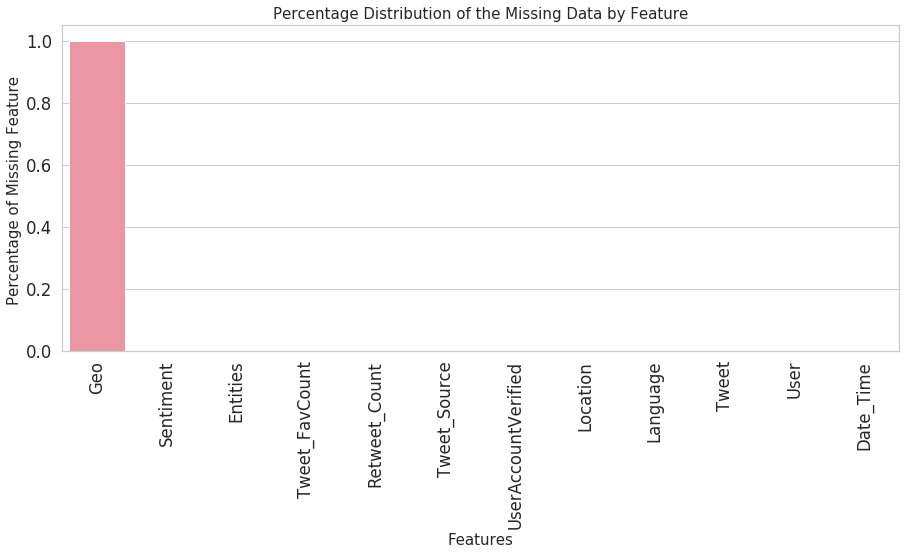

In [49]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percentage of Missing Feature ', fontsize=15)
plt.title('Percentage Distribution of the Missing Data by Feature', fontsize=15)
missing_data.head()

In [0]:
### dataset['Sentiment'] = dataset['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

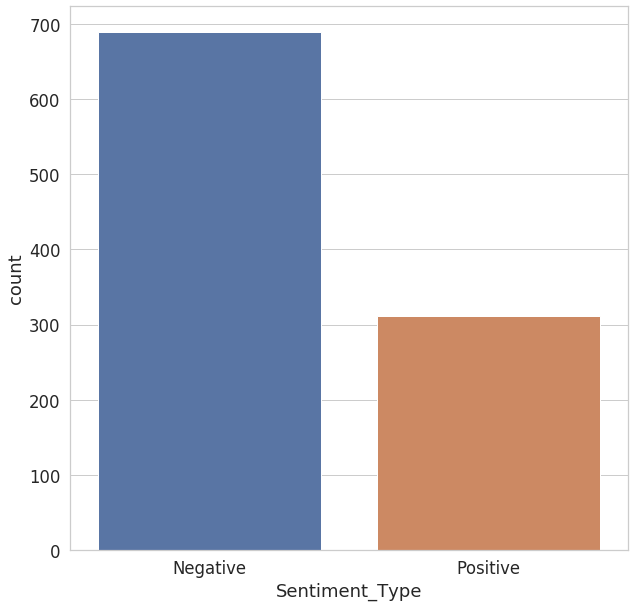

In [50]:

from textblob import TextBlob

bloblist_title = list()

df_usa_title_str=dataset['Tweet']
for row in df_usa_title_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_title = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_usa_polarity_title):
    if df_usa_polarity_title['sentiment'] > 0:
        val = "Positive"
    else:
        val = "Negative"
    return val

df_usa_polarity_title['Sentiment_Type'] = df_usa_polarity_title.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_title)

Text(0.5, 1.0, 'Top 5 Locations of the Most Tweets')

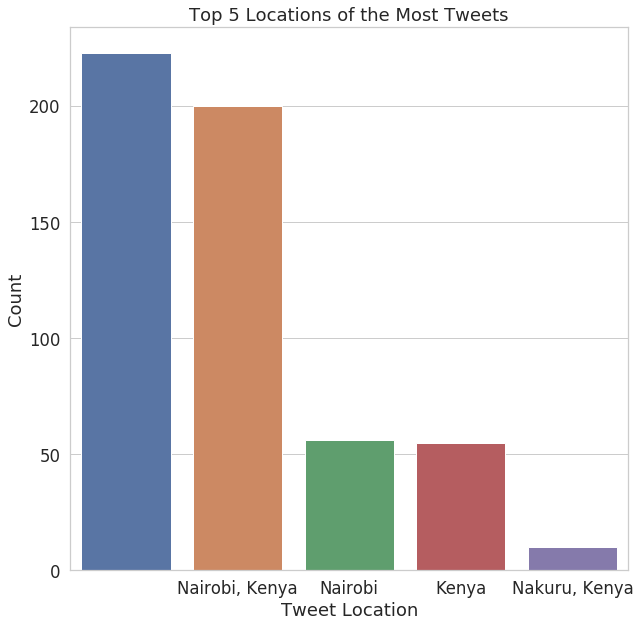

In [51]:
trending_location=dataset.groupby(by=['Location'],as_index=False).count().sort_values(by='Tweet',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=trending_location['Location'],y=trending_location['Tweet'], data=trending_location)
plt.xlabel("Tweet Location")
plt.ylabel("Count")
plt.title("Top 5 Locations of the Most Tweets")

Text(0.5, 1.0, 'Device Type used to Tweet')

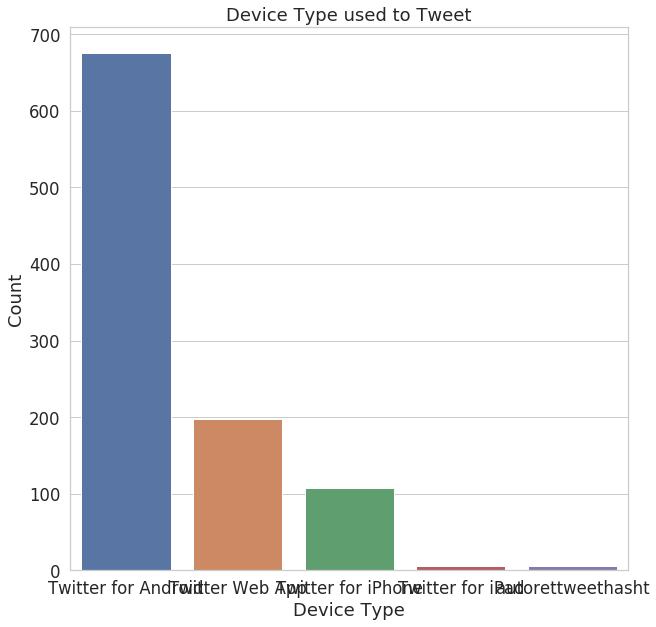

In [62]:
day_of_the_week=dataset.groupby(by=['Tweet_Source'],as_index=False).count().sort_values(by='Tweet',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=day_of_the_week['Tweet_Source'],y=day_of_the_week['Tweet'], data=day_of_the_week)
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.title("Device Type used to Tweet")

In [0]:
from wordcloud import WordCloud,STOPWORDS

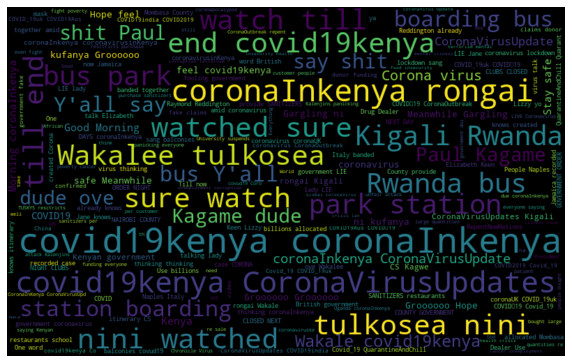

In [54]:
# Creating word Cloud for all Words in all tweets
allWords = ' '.join([text for text in dataset['Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

**Decoding the Time Stamp Column**

In [0]:
from datetime import date

In [0]:
dataset['Date_Time'] = pd.to_datetime(dataset['Date_Time'])

In [0]:
dataset['Year'] = dataset['Date_Time'].dt.year
dataset['Week of the Year'] = dataset['Date_Time'].dt.weekofyear
dataset['Day of the Year'] = dataset['Date_Time'].dt.dayofyear
dataset['Month_name'] = dataset['Date_Time'].dt.month_name()
dataset['Day of the Week'] = dataset['Date_Time'].dt.weekday
dataset['Name of the Day'] = dataset['Date_Time'].dt.day_name()
dataset['Hour'] = dataset['Date_Time'].dt.hour
dataset['Minute'] = dataset['Date_Time'].dt.minute

In [64]:
dataset.head(3)

,Geo,Date_Time,User,Tweet,Language,Location,UserAccountVerified,Tweet_Source,Retweet_Count,Tweet_FavCount,Entities,Sentiment,Year,Week of the Year,Day of the Year,Month_name,Day of the Week,Name of the Day,Hour,Minute
0,None,2020-03-14 13:55:03,AntomAntom1,I think simple precautions like avoiding grabb...,en,THIKA,False,Twitter Web App,0,0,"[(covid19kenya, MONEY)]","{'neg': 0.113, 'neu': 0.516, 'pos': 0.371, 'co...",2020,11,74,March,5,Saturday,13,55
1,None,2020-03-14 13:54:56,Mohamed29610696,The first cases of #coronaInkenya and #coronai...,en,Somalia,False,Twitter for Android,0,0,"[(first, ORDINAL), , , (Somalis, NORP)]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",2020,11,74,March,5,Saturday,13,54
2,None,2020-03-14 13:54:55,sudybe,Akina #sudi Wana maneno...lolNdio Baba wata ku...,in,Great Lakes Region,False,Twitter for iPad,0,0,"[(Wana, PERSON), (Leta Majibu, PERSON), (Aliza...","{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'comp...",2020,11,74,March,5,Saturday,13,54


Text(0.5, 1.0, 'Top 5 Users with Most Tweets')

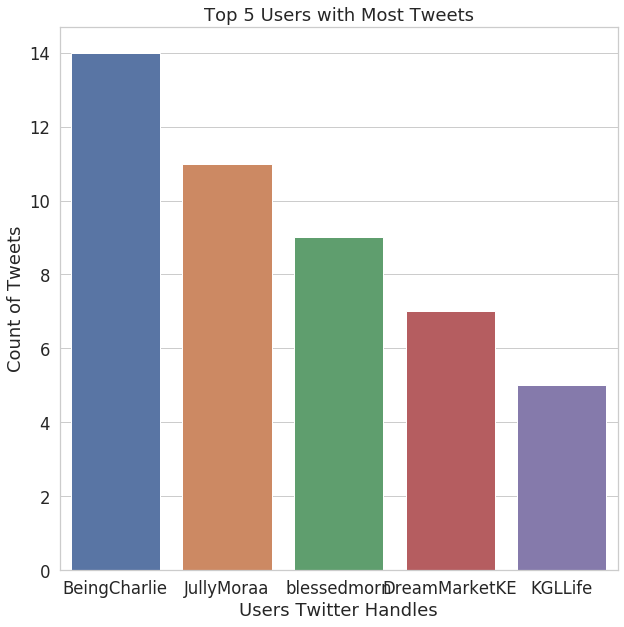

In [70]:
trending_users=dataset.groupby(by=['User'],as_index=False).count().sort_values(by='Tweet',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=trending_users['User'],y=trending_users['Tweet'], data=trending_users)
plt.xlabel("Users Twitter Handles")
plt.ylabel("Count of Tweets")
plt.title("Top 5 Users with Most Tweets")

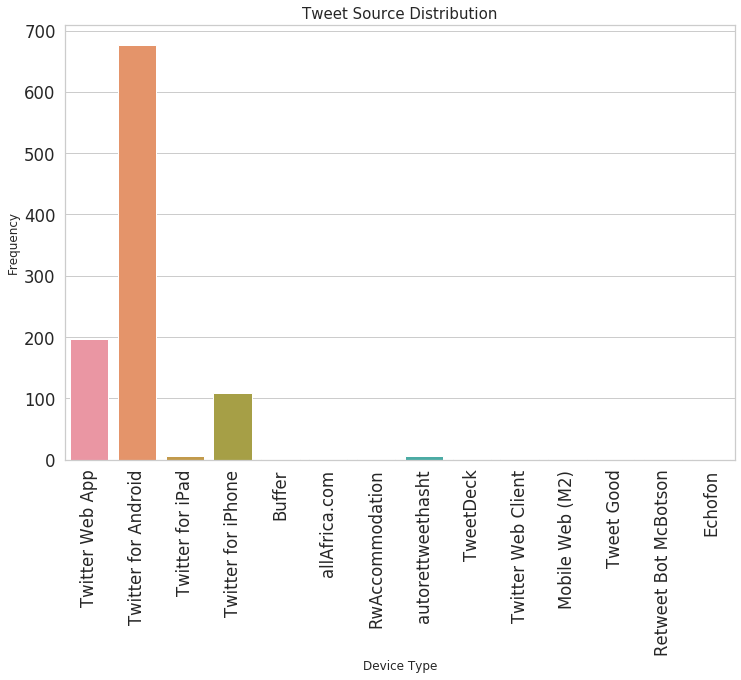

In [82]:
plt.figure(figsize=(12,8))
sns.countplot(x="Tweet_Source", data=dataset)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Device Type', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Tweet Source Distribution", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Language of the Tweets')

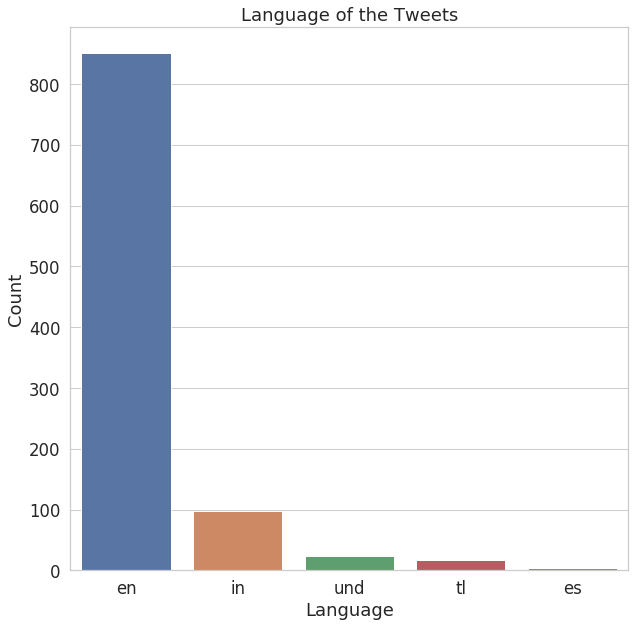

In [83]:
day_of_the_week=dataset.groupby(by=['Language'],as_index=False).count().sort_values(by='Tweet',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=day_of_the_week['Language'],y=day_of_the_week['Tweet'], data=day_of_the_week)
plt.xlabel("Language")
plt.ylabel("Count")
plt.title("Language of the Tweets")

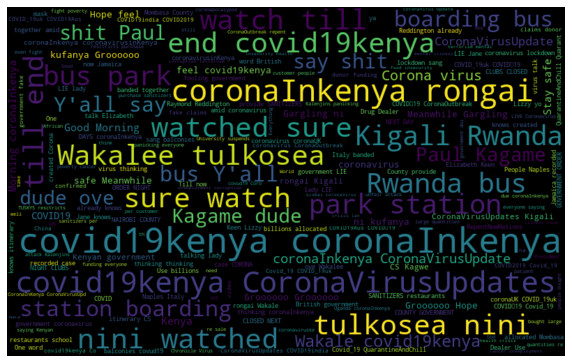

In [87]:
# Creating word Cloud for all Words in all tweets
allWords = ' '.join([text for text in dataset['Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(allWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

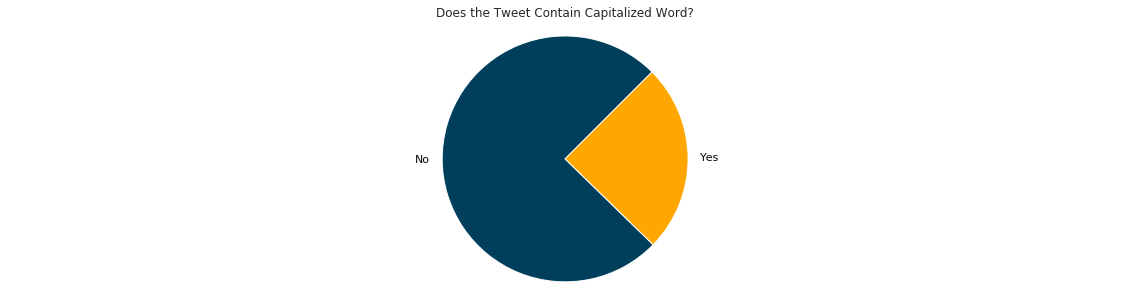

In [101]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


dataset['Contains_capitalized'] = dataset["Tweet"].apply(contains_capitalized_word)

value_counts = dataset["Contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Does the Tweet Contain Capitalized Word?')

In [102]:
dataset["Contains_capitalized"].value_counts(normalize=True)

False    0.752
True     0.248
Name: Contains_capitalized, dtype: float64

In [0]:
from collections import Counter
import datetime
import wordcloud
import json

In [105]:
title_words = list(dataset["Tweet"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('the', 384),
 ('#covid19kenya', 325),
 ('#coronaInkenya', 319),
 ('to', 312),
 ('is', 252),
 ('you', 188),
 ('this', 165),
 ('a', 160),
 ('#rongai', 148),
 ('be', 141),
 ('that', 137),
 ('but', 129),
 ('can', 128),
 ('of', 124),
 ('about', 121),
 ('#CoronaVirusUpdates', 110),
 ('in', 107),
 ('sure', 106),
 ('and', 105),
 ('say', 105),
 ('#CoronaVirusUpdates…', 105),
 ('watch', 105),
 ('till', 104),
 ('Rwanda', 103),
 ('Wakalee', 103)]

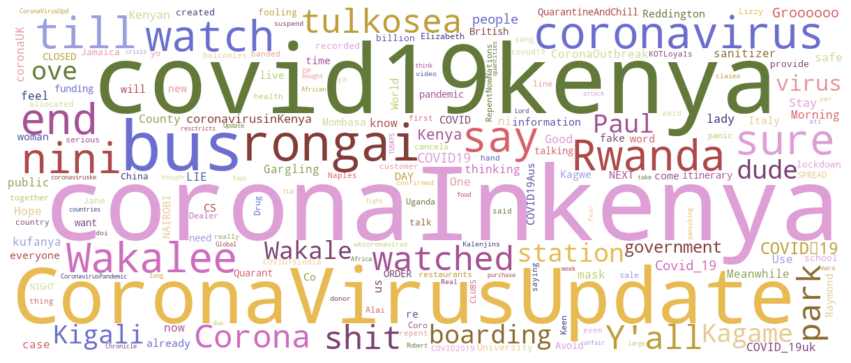

In [106]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

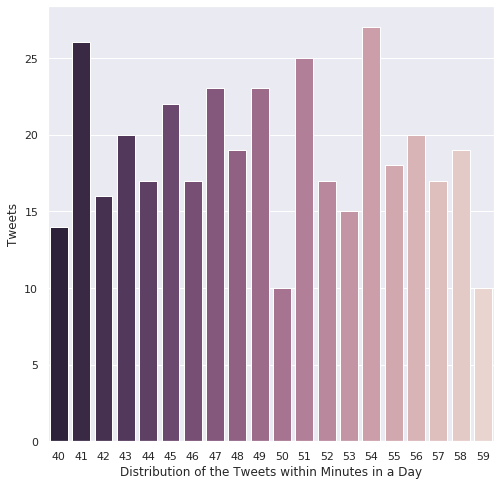

In [110]:
cdf = dataset.groupby("Minute").size().reset_index(name="Tweet") \
    .sort_values("Minute", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="Minute", y="Tweet", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="Distribution of the Tweets within Minutes in a Day", ylabel="Tweets")

Text(0.5, 1.0, 'Location Nairobi Tweets Hourly Distribution')

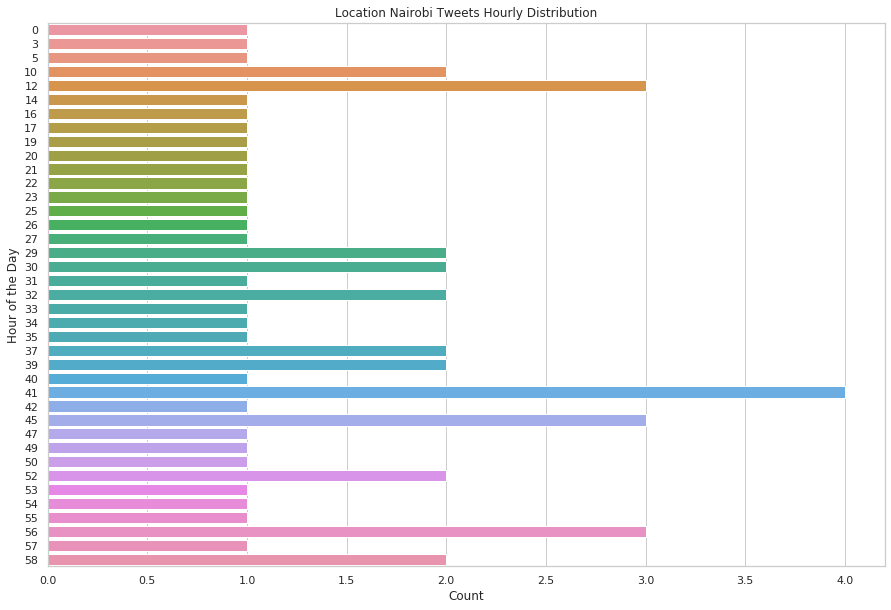

In [114]:
cat_df_us = dataset[dataset['Location']=='Nairobi']['Minute'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_us['index'],x=cat_df_us['Minute'], data=cat_df_us,orient='h')
plt.xlabel("Count")
plt.ylabel("Hour of the Day")
plt.title("Location Nairobi Tweets Hourly Distribution")

Text(0.5, 1.0, 'Tweets Source Device Types Hourly Distribution in Kenya')

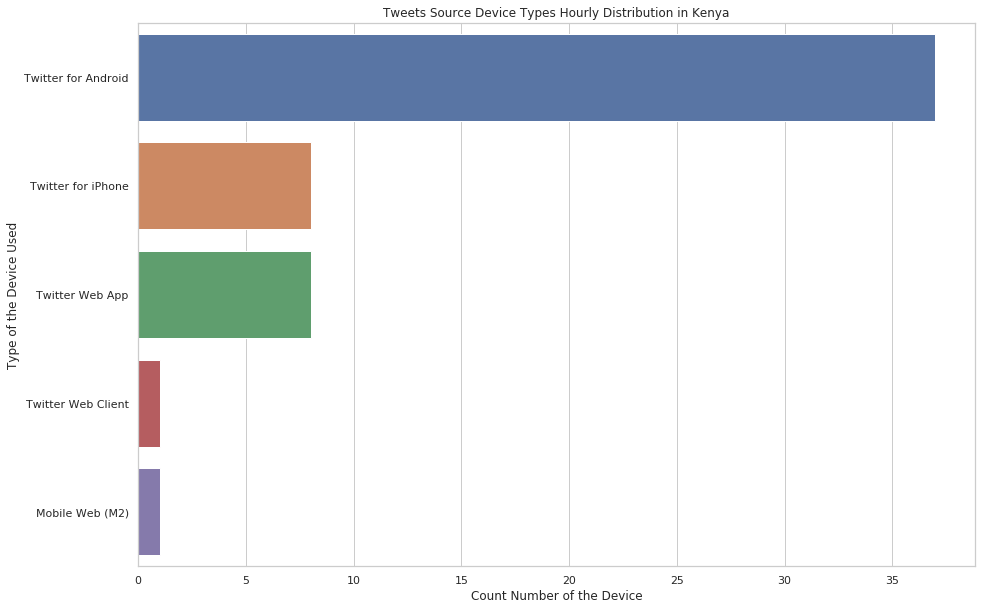

In [116]:
cat_df_ca = dataset[dataset['Location']=='Kenya']['Tweet_Source'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_ca['index'],x=cat_df_ca['Tweet_Source'], data=cat_df_ca,orient='h')
plt.xlabel("Count Number of the Device")
plt.ylabel("Type of the Device Used")
plt.title("Tweets Source Device Types Hourly Distribution in Kenya")

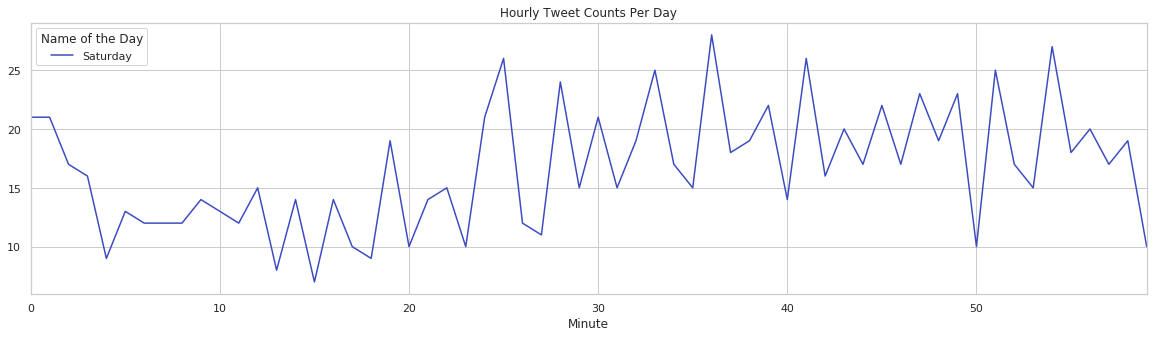

In [117]:
#Number of tweets by the days

monthly_tweets = dataset.groupby(['Minute', 'Name of the Day']).size().unstack()
monthly_tweets.plot(title='Hourly Tweet Counts Per Day', colormap='coolwarm')

TOP 5 Hour values
36    28
54    27
41    26
25    26
33    25
Name: Minute, dtype: int64


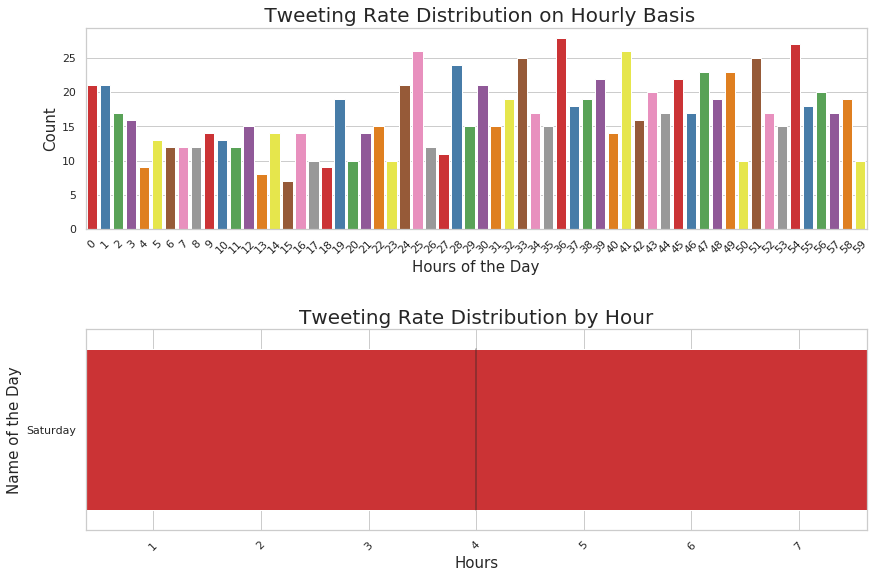

In [119]:

print("TOP 5 Hour values")
print(dataset['Minute'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('Minute', data=dataset, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title(" Tweeting Rate Distribution on Hourly Basis", fontsize=20)
g.set_xlabel("Hours of the Day", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='Minute', y='Name of the Day', data=dataset, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Tweeting Rate Distribution by Hour", fontsize=20)
g1.set_xlabel("Hours", fontsize=15)
g1.set_ylabel("Name of the Day", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

Text(0.5, 1.0, 'The Number of Retweets by Hour')

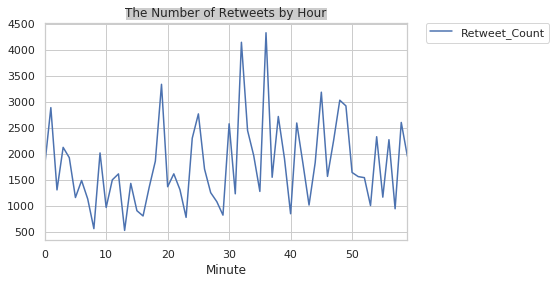

In [123]:
tweets_hour = dataset.groupby(['Minute'])['Retweet_Count'].sum()
import seaborn as sns
tweets_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The Number of Retweets by Hour', bbox={'facecolor':'0.8', 'pad':0})